In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("KS_train_data.csv", delimiter=',') 
test = pd.read_csv("KS_test_data.csv", delimiter=';')

In [4]:
data['funded'].value_counts()

True     58454
False    41546
Name: funded, dtype: int64

<AxesSubplot:>

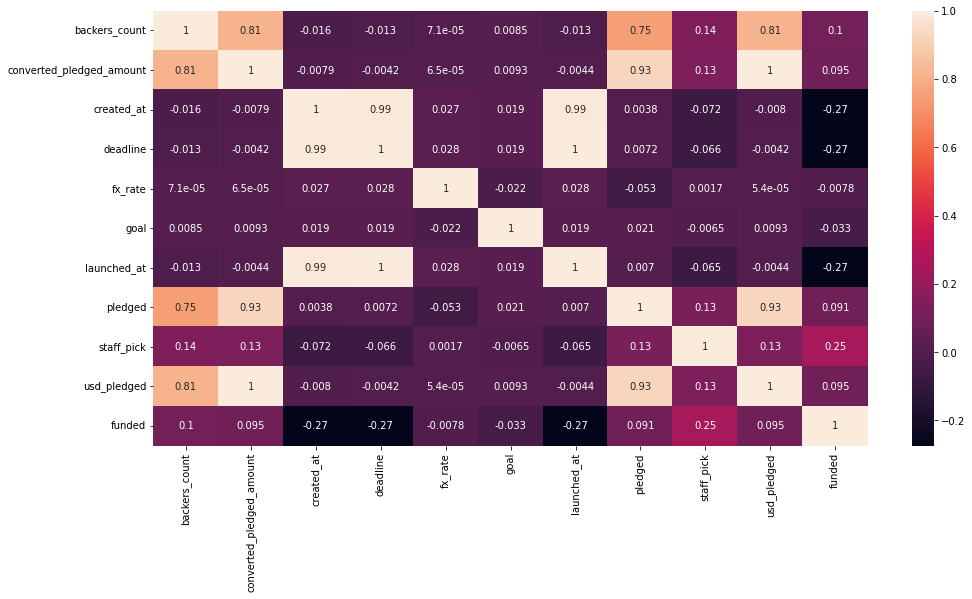

In [5]:
corrmat = data.corr()

sns.heatmap(corrmat, annot=True)

In [6]:
data['Prob_score'] = ""

index = 0
for row in data.category:
    if index == 0:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)]) 
    elif row != category:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)])
    data.Prob_score[index] = true_values / total_values
    index += 1

In [7]:
data['rem_time'] = data['deadline'] - data['launched_at']

In [8]:
#here 2 possible outliers can be seen at the top
# data.nlargest(15,['converted_pledged_amount'] )
# pd.reset_option('display.max_rows')
# data.category.value_counts()
data['Prob_score'].head(10000)

0       0.558767
1       0.558767
2       0.558767
3       0.558767
4       0.558767
          ...   
9995    0.760194
9996    0.760194
9997    0.760194
9998    0.760194
9999    0.760194
Name: Prob_score, Length: 10000, dtype: object

<AxesSubplot:>

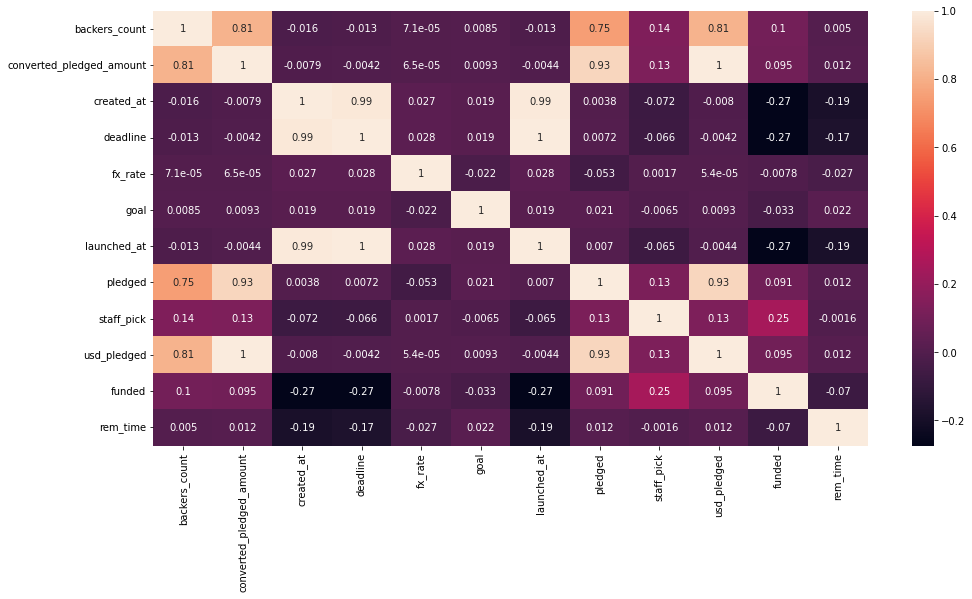

In [9]:
corrmat2 = data.corr()

sns.heatmap(corrmat2, annot=True)

In [10]:
data.head()

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url,Prob_score,rem_time
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,3596.0,False,3596.0,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...,0.558767,1897300
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,4586.0,False,4586.0,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...,0.558767,3456000
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,5217.0,False,5217.0,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...,0.558767,5184000
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,7160.0,False,7160.0,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...,0.558767,1814400
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,15445.0,False,15445.0,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...,0.558767,2592000


In [29]:
data['norm_goal'] = preprocessing.normalize([data.goal])[0]
data['norm_launched'] = preprocessing.normalize([data.launched_at])[0]
data['norm_deadline'] = preprocessing.normalize([data.deadline])[0]
data['norm_prob'] = preprocessing.normalize([data.Prob_score])[0]
data['norm_rem_time'] = preprocessing.normalize([data.deadline])[0]
data.head(10000)


,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,subcategory,project_url,reward_url,Prob_score,rem_time,norm_goal,norm_launched,norm_deadline,norm_prob,norm_rem_time
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.0,...,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...,0.558767,1897300,7.045099e-06,0.002999,0.002997,0.002941,0.002997
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.0,...,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...,0.558767,3456000,1.132248e-05,0.002999,0.003001,0.002941,0.003001
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.0,...,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...,0.558767,5184000,1.258053e-05,0.002999,0.003005,0.002941,0.003005
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.0,...,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...,0.558767,1814400,1.635469e-05,0.002999,0.002997,0.002941,0.002997
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.0,...,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...,0.558767,2592000,3.774160e-05,0.002999,0.002999,0.002941,0.002999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,KS_009995,16,The time is approaching for the seventh annual...,comics,449,US,1340372001,USD,1343238988,1.0,...,comics,https://www.kickstarter.com/projects/178680013...,https://www.kickstarter.com/projects/178680013...,0.760194,2592000,9.410240e-07,0.003017,0.003016,0.004002,0.003016
9996,KS_009996,78,A four issue comic series detailing the rise a...,comics,3051,US,1339189928,USD,1343445720,1.0,...,comics,https://www.kickstarter.com/projects/739248949...,https://www.kickstarter.com/projects/739248949...,0.760194,2798374,7.548320e-06,0.003017,0.003017,0.004002,0.003017
9997,KS_009997,45,A new collection of scary stories for horror f...,comics,2505,US,1339021879,USD,1343242538,1.0,...,comics,https://www.kickstarter.com/projects/124994609...,https://www.kickstarter.com/projects/124994609...,0.760194,2592000,3.774160e-06,0.003017,0.003016,0.004002,0.003016
9998,KS_009998,40,Help Devil's Due in the journey to San Diego &...,comics,2083,US,1339647146,USD,1342069140,1.0,...,comics,https://www.kickstarter.com/projects/devilsdue...,https://www.kickstarter.com/projects/devilsdue...,0.760194,1273024,2.516107e-06,0.003017,0.003014,0.004002,0.003014
